This notebook explores numerical integration methods using Python.

Date Created: 14 Nov 2018
<br>
Last Modified: 16 Nov 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
N = 11
a = 0
b = 1
Delta_x = (b-a)/(N-1)

In [4]:
def my_func1(x):
    return x**2 

In [5]:
x = np.linspace(a,b,N)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [6]:
y = my_func1(x)
y

array([ 0.  ,  0.01,  0.04,  0.09,  0.16,  0.25,  0.36,  0.49,  0.64,
        0.81,  1.  ])

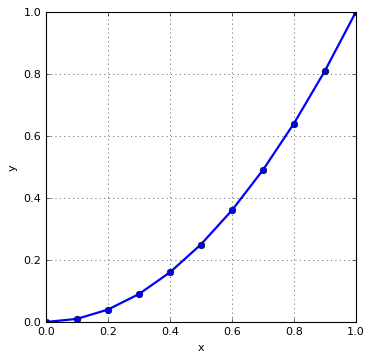

In [7]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'bo-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# 0th order (Riemann sums)

$$
I \approx \Delta x \sum_{n=1}^{N-1} f(x_n)
$$

$$
x_n = a + n\Delta x
$$

In [8]:
Delta_x * np.sum(y[0:N-1])

0.28500000000000009

# 1st order (Trapezoidal rule)

$$
I \approx \frac{1}{2} \Delta x \left( f(x_1) + 2\sum_{n=2}^{N-1} f(x_n) + f(x_N)\right)
$$

In [9]:
Delta_x * (1/2) * (y[0] + 2*np.sum(y[1:N-1]) + y[N-1])

0.33500000000000008

# 2nd order (Simpson's rule)

$$
I \approx \frac{1}{3} \Delta x 
\left( 
f(x_1) 
+ 4 \sum_{\substack{n\text{ odd} \\ 1,\cdots,N-1}} f(x_n) 
+ 2 \sum_{\substack {n\text{ even} \\ 2,\cdots,N-2}} f(x_n) 
+ f(x_N)
\right)
$$

In [10]:
Delta_x * (1/3) * (y[0] + 4*np.sum(y[1:N-1:2]) + 2*np.sum(y[2:N-1:2]) + y[N-1])

0.33333333333333331

# Higher order

https://en.wikipedia.org/wiki/Newton–Cotes_formulas

# Scipy's rule

In [11]:
from scipy.integrate import quad

In [12]:
I = quad(my_func1, 0, 1)

In [13]:
I

(0.33333333333333337, 3.700743415417189e-15)

In [16]:
from scipy.integrate import quad_explain

In [17]:
quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:

            f(int n, double args[n]),

        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
        Lower limit of integration (use -numpy.inf for -infinity).
    b : float
        Upper limit of integration (use numpy.inf for +infinity).
    args : tuple, optional
        Extra arguments to pass to `func`.
    full_output :